In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install monai==1.3.0 nibabel SimpleITK scikit-learn pandas matplotlib
!pip install itk
!pip install -q monai[itk] SimpleITK itk

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.6 MB/s eta 0:00:00
  Attempting uninstal

In [ ]:
!ls /content/drive/MyDrive/


'1. Microprocessor complete class note (1).pdf'
'1. Microprocessor complete class note.pdf'
'Ai ut solution.pdf'
'Auto_CatalystReport 1.pdf'
'Capacitor pdf manual.pdf'
 Classroom
'Colab Notebooks'
'Compressed Compressed Ai assessment solu (1).pdf'
'Compressed Compressed Ai assessment solu.pdf'
'edc set 020324.pdf'
'F05-1-Product Backlog Jestate Client-A Real State System V2.0.gsheet'
 lab-Report1.docx
 Labsheet0.docx
 Labsheet0.gdoc
 labsheet2_false_position.docx
 labsheet3_newton_rhapson.docx
 labsheet4_secant_method.docx
 labsheet5_Gauss_method.docx
 labsheet6gauss_seidel.docx
'microprocessor ioe full note-tuts by er. hari aryaल.pdf'
 nnUNet_data
 OStutorial.pdf
'programming for everybody(Python).pdf'
 prostate_project
 tutorial-4.pdf


In [ ]:
!pip install SimpleITK

In [ ]:
import os
import pandas as pd
import numpy as np
import SimpleITK as sitk
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.models import Model

base_model = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(299, 299, 3)))
base_model.trainable = False  # freeze base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 149, 149,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 147, 147,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 147, 147,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 73, 73,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 73, 73,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 71, 71,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 21,933,985 (83.67 MB)

 Trainable params: 131,201 (512.50 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
# Path setup
import os
import time
import pandas as pd

project_root = "/content/drive/MyDrive/prostate_project"
images_dir = os.path.join(project_root, "mri_images")
clinical_data_path = os.path.join(project_root, "marksheet.csv")

#Check if Google Drive is mounted and the path exist
clinical_data_dir = os.path.dirname(clinical_data_path)

# Add a loop to wait briefly for the directory to be accessible
print(f"Checking if directory exists: {clinical_data_dir}")
max_wait_time = 30 # seconds
wait_interval = 5 # seconds
elapsed_time = 0

while not os.path.exists(clinical_data_dir) and elapsed_time < max_wait_time:
    print(f"Directory not found: {clinical_data_dir}. Waiting for {wait_interval} seconds...")
    time.sleep(wait_interval)
    elapsed_time += wait_interval

if not os.path.exists(clinical_data_dir):
    print(f"Error: Directory {clinical_data_dir} still not found after {max_wait_time} seconds. Please ensure Google Drive is mounted correctly.")

else:
    print(f"Directory found: {clinical_data_dir}")
    # Check if the file exists within the directory
    if not os.path.exists(clinical_data_path):
         print(f"Error: Clinical data file not found at {clinical_data_path} even though the directory exists.")
         print(f"Contents of {clinical_data_dir}:")
         try:
             print(os.listdir(clinical_data_dir))
         except Exception as e:
             print(f"Could not list directory contents: {e}")

    else:
        print(f"Clinical data file found: {clinical_data_path}")
        #Load clinical data
        clinical_df = pd.read_csv(clinical_data_path)
        clinical_df['case_csPCa'] = clinical_df['case_csPCa'].map({'YES': 1.0, 'NO': 0.0})

Checking if directory exists: /content/drive/MyDrive/prostate_project
Directory found: /content/drive/MyDrive/prostate_project
Clinical data file found: /content/drive/MyDrive/prostate_project/marksheet.csv


In [ ]:
 # Build usable data list
data_list = []
for idx, row in clinical_df.iterrows():
    pid = str(row["patient_id"])
    folder = os.path.join(images_dir, pid)
    if not os.path.exists(folder):
        continue

    all_files = os.listdir(folder)
    try:
        t2w = [f for f in all_files if "t2w" in f.lower()][0]
        t2w_path = os.path.join(folder, t2w)
    except:
         continue

    label = row["case_csPCa"]
    if os.path.exists(t2w_path):
        data_list.append({"t2w": t2w_path, "label": label})

print(f"Total usable cases: {len(data_list)}")

# === Split train and test sets ===
if data_list:
    train_data, test_data = train_test_split(data_list, test_size=0.2, random_state=42, stratify=[d["label"] for d in data_list])
    print(f"Train: {len(train_data)} | Test: {len(test_data)}")

Total usable cases: 1500
Train: 1200 | Test: 300


In [ ]:
# MRI loading and preprocessing
def load_middle_slice(path):
    img = sitk.ReadImage(path)
    array = sitk.GetArrayFromImage(img)
    mid_slice = array[array.shape[0] // 2]
    return mid_slice.astype(np.float32)

class ProstateMRIDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]
        image = load_middle_slice(item["t2w"])
        image = np.expand_dims(image, axis=-1)  # (H, W, 1)
        image = np.repeat(image, 3, axis=-1)    # (H, W, 3)
        if self.transform:
            image = self.transform(image)
        label = torch.tensor(item["label"], dtype=torch.long)
        return image, label

# Transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((299, 299)),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# DataLoaders

train_dataset = ProstateMRIDataset(train_data, transform)
test_dataset = ProstateMRIDataset(test_data, transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [ ]:
# === InceptionV3 Model ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from torchvision.models import Inception_V3_Weights

# Initialize the model first with weights and aux_logits=True
weights = Inception_V3_Weights.DEFAULT
model = models.inception_v3(weights=weights, aux_logits=True)

# Modify the auxiliary classifier if aux_logits is True
if model.AuxLogits is not None:
    model.AuxLogits.fc = nn.Linear(model.AuxLogits.fc.in_features, 2) # Change to 2 classes

# Modify the final fully connected layer to match the number of classes (2 in this case)
model.fc = nn.Linear(model.fc.in_features, 2) # Change to 2 classes
model = model.to(device)

# Training setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
epochs = 10

# Training loop
model.train()
for epoch in range(epochs):
    running_loss = 0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs, aux_outputs = model(images)

        # Calculate loss using both main and auxiliary outputs during training
        loss1 = criterion(outputs, labels)
        loss2 = criterion(aux_outputs, labels)
        loss = loss1 + 0.4 * loss2 # The auxiliary loss is typically weighted

        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1} loss: {running_loss/len(train_loader):.4f}")

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 111MB/s] 
Epoch 1: 100%|██████████| 150/150 [1:13:45<00:00, 29.50s/it]


Epoch 1 loss: 0.8507


Epoch 2: 100%|██████████| 150/150 [22:29<00:00,  9.00s/it]


Epoch 2 loss: 0.6680


Epoch 3: 100%|██████████| 150/150 [22:29<00:00,  8.99s/it]


Epoch 3 loss: 0.4331


Epoch 4: 100%|██████████| 150/150 [22:27<00:00,  8.98s/it]


Epoch 4 loss: 0.3047


Epoch 5: 100%|██████████| 150/150 [22:20<00:00,  8.94s/it]


Epoch 5 loss: 0.2331


Epoch 6: 100%|██████████| 150/150 [21:18<00:00,  8.52s/it]


Epoch 6 loss: 0.2187


Epoch 7: 100%|██████████| 150/150 [21:13<00:00,  8.49s/it]


Epoch 7 loss: 0.1421


Epoch 8: 100%|██████████| 150/150 [21:22<00:00,  8.55s/it]


Epoch 8 loss: 0.1363


Epoch 9: 100%|██████████| 150/150 [21:18<00:00,  8.53s/it]


Epoch 9 loss: 0.1117


Epoch 10: 100%|██████████| 150/150 [21:22<00:00,  8.55s/it]

Epoch 10 loss: 0.1338


Test Accuracy: 0.6967


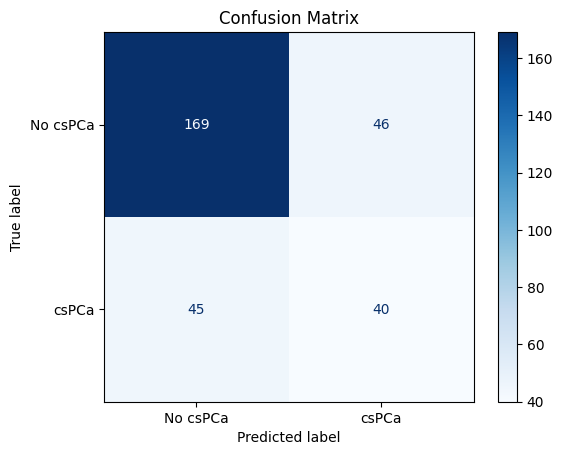


Model evaluation finished.


In [ ]:
  # === Evaluation ===
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        # During evaluation, InceptionV3 with aux_logits=True returns a standard Tensor


        preds = torch.argmax(outputs, dim=1).cpu().numpy() # Access outputs directly
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

# === Metrics ===
acc = accuracy_score(all_labels, all_preds)
cm = confusion_matrix(all_labels, all_preds)
print(f"Test Accuracy: {acc:.4f}")

disp = ConfusionMatrixDisplay(
  confusion_matrix=cm,
  display_labels=["No csPCa", "csPCa"]
  )
disp.plot(cmap="Blues")
plt.title('Confusion Matrix')
plt.show()

print("\nModel evaluation finished.")
# ConfusionMatrixDisplay(cm).plot()
# plt.title("Confusion Matrix")
# plt.show()